In [1]:
cd E:\PRO - PROGRAMACION E INGENIERIA\Curso Python en Hidrologia\Sesiones\Sesion 9\Datos Canete

E:\PRO - PROGRAMACION E INGENIERIA\Curso Python en Hidrologia\Sesiones\Sesion 9\Datos Canete


In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import random as rd

In [3]:
caudales=pd.read_excel('Caudales.xlsx','Hoja1')

In [4]:
caudales.head()

,STA,ANO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
0,103,1962,16.04226,8.71674,5.42733,5.65920,1.68990,0.91176,0.76635,0.85674,0.97464,0.70740,0.94713,0.98250
1,103,1963,12.59958,16.14051,8.97612,6.32730,2.05146,1.46196,1.11219,1.12005,0.87639,0.92355,1.65453,1.78815
2,103,1964,2.17329,4.41339,4.55880,2.68026,1.65846,1.41087,1.22616,1.15935,0.92748,0.57771,0.83316,1.23795
3,103,1965,1.24974,3.72564,3.89463,1.78422,1.17507,1.11612,0.98643,0.95106,0.86460,0.79386,0.54234,1.14363
4,103,1966,1.04145,2.41302,3.17544,1.01394,0.95892,0.77814,0.71526,0.69168,0.60129,0.65631,1.23009,1.46982


In [5]:
Entrenamiento=caudales[:40]
test=caudales[40:]

In [6]:
Entrenamiento.__delitem__('STA')
Entrenamiento.__delitem__('ANO')
test.__delitem__('STA')
test.__delitem__('ANO')

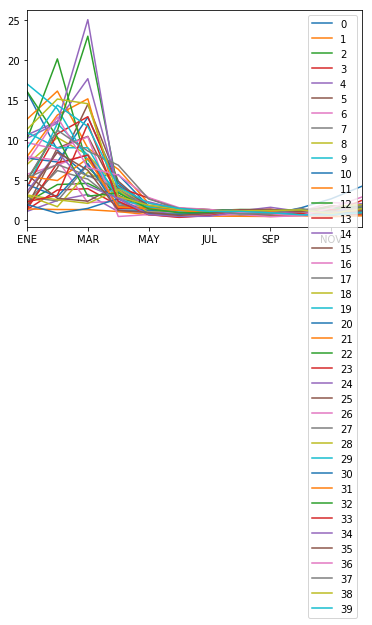

In [7]:
Entrenamiento.transpose().plot()
pl.show()

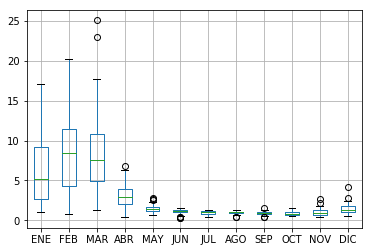

In [8]:
Entrenamiento.boxplot()
pl.show()

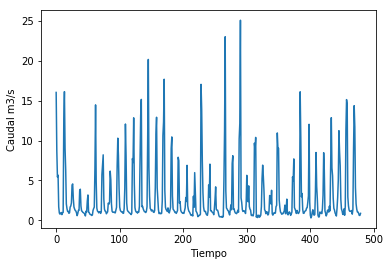

In [9]:
Matriz=np.array(Entrenamiento)
Matriz=Matriz.reshape(40*12)
pl.plot(Matriz)
pl.xlabel('Tiempo')
pl.ylabel('Caudal m3/s')
pl.show()

In [10]:
minimos=list(Entrenamiento.min())
maximos=list(Entrenamiento.max())
std=list(Entrenamiento.std())
promedio=list(Entrenamiento.mean())
correl=[.087,.6425,.4708,.1443,.6595,.818,.9034,.321,.7649,.4225,.4815,.7079]

b=[] #"b" es la pendiente de la ecuación de regresión entre el caudal del mes actual con el caudal del mes anterior
for num in range(12):
    b.append(correl[num]*(std[num]/std[-1+num]))
ruido=[]
for num in range(480):
    ruido.append(rd.normalvariate(0,1))

In [11]:
mini=[]
maxi=[]
stad=[]
prome=[]
corr=[]
pendi=[]
for n in range(40):
    mini=mini+minimos
    maxi=maxi+maximos
    stad=stad+std
    prome=prome+promedio
    corr=corr+correl
    pendi=pendi+b

In [12]:
simulado=[16.04226]
for i in range(480):
    simulado.append(abs(prome[i]+corr[i]*(simulado[-1]-prome[i])+stad[i]*ruido[i]*(1-corr[i]**2)**.5))

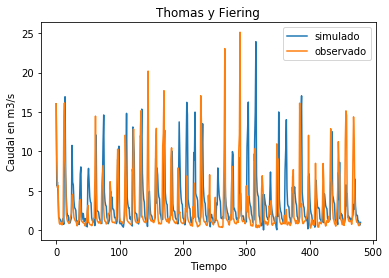

In [13]:
pl.plot(simulado)
pl.plot(Matriz)
pl.xlabel('Tiempo')
pl.ylabel('Caudal en m3/s')
pl.title('Thomas y Fiering')
pl.legend(['simulado','observado'])
pl.show()

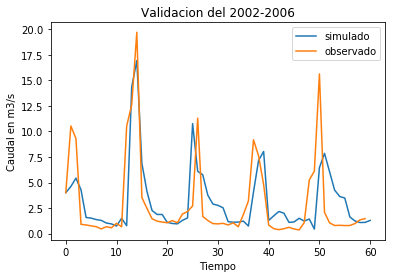

In [14]:
TEST=np.array(test)
TEST=TEST.reshape(60)
simulado2=[4.0086]
for i in range(60):
    simulado2.append(abs(prome[i]+corr[i]*(simulado2[-1]-prome[i])+stad[i]*ruido[i]*(1-corr[i]**2)**.5))
    
pl.plot(simulado2)
pl.plot(TEST)
pl.xlabel('Tiempo')
pl.ylabel('Caudal en m3/s')
pl.title('Validacion del 2002-2006')
pl.legend(['simulado','observado'])
pl.show()

In [15]:
#cuanto explica nuestro modelo calculando el R
n1=np.mean(TEST)
#la variacion total es:
var=[]
varsim=[]
for i in range(len(TEST)):
    var.append((TEST[i]-n1)**2)
    varsim.append((simulado2[i]-TEST[i])**2)
TotalVar=sum(var)   
TotalVarSim=sum(varsim)

R=1-TotalVarSim/TotalVar

In [16]:
TotalVarSim

580.52756414042653

In [17]:
R

0.42637200574263423

In [18]:
Entrenamiento.corr()

,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
ENE,1.000000,0.642551,0.205949,0.350545,0.368477,0.237676,0.210614,0.249499,0.231733,0.147526,0.036058,0.087499
FEB,0.642551,1.000000,0.470847,0.370214,0.572908,0.499768,0.442146,0.499950,0.397593,0.272047,0.013565,0.141558
MAR,0.205949,0.470847,1.000000,0.144370,0.413316,0.384203,0.360650,0.358831,0.375550,0.242754,-0.053892,0.180855
ABR,0.350545,0.370214,0.144370,1.000000,0.659548,0.506502,0.424877,0.062524,0.116200,0.123737,-0.067918,0.095305
MAY,0.368477,0.572908,0.413316,0.659548,1.000000,0.818072,0.660162,0.169392,0.087796,0.186213,-0.015249,0.321185
JUN,0.237676,0.499768,0.384203,0.506502,0.818072,1.000000,0.903438,0.270832,0.144868,0.168569,0.031637,0.221728
JUL,0.210614,0.442146,0.360650,0.424877,0.660162,0.903438,1.000000,0.321052,0.249752,0.212348,0.134185,0.217443
AGO,0.249499,0.499950,0.358831,0.062524,0.169392,0.270832,0.321052,1.000000,0.764994,0.301286,0.198491,0.136684
SEP,0.231733,0.397593,0.375550,0.116200,0.087796,0.144868,0.249752,0.764994,1.000000,0.422501,0.136313,-0.065463
OCT,0.147526,0.272047,0.242754,0.123737,0.186213,0.168569,0.212348,0.301286,0.422501,1.000000,0.481548,0.455119
